In this project, we will be looking at some interesting data based on movie data from the IMDB.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Movies dataset:
This data shows the movies based on their title and the year of release.

In [2]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [3]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


Cast dataset:
This data shows the cast (actors, actresses, supporting roles) for each movie.
The attribute n basically tells the importance of the cast role, lower the number, more important the role.
Supporting cast usually don't have any value for n.

In [4]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [5]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


Release dataset: 
This data shows details of when each movie was release in each country with the release date.

In [6]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [7]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Basic Querying, Filtering and Transformations

Total number of movies

In [9]:
len(movies)

244914

List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
harrypotter_df = movies[(movies.title.str.contains('Harry', case=False)) & (movies.title.str.contains('Potter', case=False))]
harrypotter_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

How many movies were made from 2000 till 2018?

In [15]:
years_series = movies['year']
len(movies[years_series.between(2000, 2018)])

114070

How many movies are titled "Hamlet"?

In [16]:
len(movies[movies.title == "Hamlet"])

20

List all movies titled "Hamlet".
The movies should only have been released on or after the year 2000.
Display the movies based on the year they were released (earliest to most recent).

In [17]:
years_2000_and_after_series = movies['year'] >= 2000
hamlet_series = movies['title'] == "Hamlet"
years_2000_and_after_and_hamlet_series = (years_2000_and_after_series) & (hamlet_series)
movies[years_2000_and_after_and_hamlet_series].sort_values(by=['year'], ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


How many roles in the movie "Inception" are of the supporting cast?
Supporting cast are NOT ranked by an "n" value (NaN).

In [18]:
inception_series = cast['title'] == "Inception"
inception_df = cast[inception_series]
null_filled_inception_series = inception_df['n'].isnull()
len(inception_df[null_filled_inception_series])

27

How many roles in the movie "Inception" are of the main cast.
Main cast always have an 'n' value.

In [19]:
inception_series = cast['title'] == "Inception"
inception_df = cast[inception_series]
not_null_filled_inception_series = inception_df['n'].notnull()
len(inception_df[not_null_filled_inception_series])

51

Show the top ten cast (actors\actresses) in the movie "Inception".
Support cast always have an 'n' value.

In [20]:
inception_series = cast['title'] == "Inception"
inception_df = cast[inception_series]
inception_top_ten_name = inception_df.sort_values(by=['n'], ascending=True)[['name']].head(10)
inception_top_ten_name.rename(columns = {'name': 'Actor\\Actress'})

,Actor\Actress
590576,Leonardo DiCaprio
859993,Joseph Gordon-Levitt
3387147,Ellen Page
940923,Tom Hardy
2406531,Ken Watanabe
1876301,Dileep Rao
1615709,Cillian Murphy
183937,Tom Berenger
2765969,Marion Cotillard
1826027,Pete Postlethwaite


List all movies where there was a character 'Albus Dumbledore'.

In [21]:
character_present = cast['character'] == 'Albus Dumbledore'
cast[character_present]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


Now modify the above to show only the actors who played the character 'Albus Dumbledore'.
Remember the same actor might play the same role in multiple movies.

In [22]:
cast[character_present][['name']].drop_duplicates()

,name
704984,Dane Farwell
792421,Michael Gambon
947789,Richard Harris
1685537,George (X) O'Connor
2248085,Timothy Tedmanson


How many roles has 'Keanu Reeves' played throughout his career?

In [24]:
keanu_reeves_series = cast['name'] == 'Keanu Reeves'
len(cast[keanu_reeves_series])

62

List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [25]:
keanu_reeves_df = cast[keanu_reeves_series]
keanu_reeves_leading = keanu_reeves_df['n'] == 1.0
keanu_reeves_movies_on_or_after_1999 = keanu_reeves_df['year'] >= 1999
keanu_reeves_leading_in_movies_on_or_after_1999 = keanu_reeves_df[(keanu_reeves_leading) & (keanu_reeves_movies_on_or_after_1999)]
keanu_reeves_leading_in_movies_on_or_after_1999.sort_values(by=['year'])

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


List the total number of actor and actress roles available from 1950 - 1960.

In [26]:
years_series = cast['year']
cast_1950_to_1960_df = cast[years_series.between(1950, 1960)]
len(cast_1950_to_1960_df[cast_1950_to_1960_df['type'] == 'actor']) + len(cast_1950_to_1960_df[cast_1950_to_1960_df['type'] == 'actress'])

234635

List the total number of actor and actress roles available from 2007 - 2017.

In [27]:
years_series = cast['year']
cast_2007_to_2017_df = cast[years_series.between(2007, 2017)]
len(cast_2007_to_2017_df[cast_2007_to_2017_df['type'] == 'actor']) + len(cast_2007_to_2017_df[cast_2007_to_2017_df['type'] == 'actress'])

1452413

List the total number of leading roles available from 2000 to present.

In [28]:
years_2000_to_present_series = cast['year'] >= 2000
years_2000_to_present_df = cast[years_2000_to_present_series]
leading_roles_series = years_2000_to_present_df['n'] == 1.0
len(years_2000_to_present_df[leading_roles_series])

60568

List the total number of non-leading roles available from 2000 - present (exclude support cast).

In [29]:
years_2000_to_present_series = cast['year'] >= 2000
years_2000_to_present_df = cast[years_2000_to_present_series]
non_leading_roles_series = years_2000_to_present_df['n'] > 1.0
non_support_cast_series = years_2000_to_present_df['n'].notnull()
years_2000_to_present_non_leading_exclude_support_df = years_2000_to_present_df[(non_leading_roles_series) & (non_support_cast_series)]
len(years_2000_to_present_non_leading_exclude_support_df)

1001710

List the total number of support\extra-credit roles available from 2000 - present

In [30]:
years_2000_to_present_series = cast['year'] >= 2000
years_2000_to_present_df = cast[years_2000_to_present_series]
support_cast_series = years_2000_to_present_df['n'].isnull()
years_2000_to_present_support_cast_df = years_2000_to_present_df[support_cast_series]
len(years_2000_to_present_support_cast_df)

887484

### Aggregations, Transformations and Visualizations

What are the top ten most common movie names of all time?

In [32]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Othello                 11
Honeymoon               11
Freedom                 11
Name: title, dtype: int64

Plot the top ten common movie names of all time.

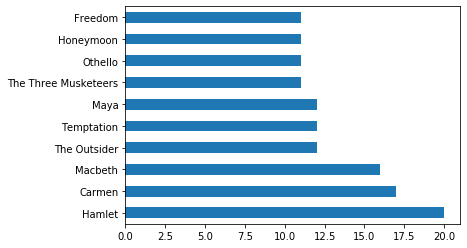

In [33]:
top_ten.plot(kind='barh')

Which years in the 2000s saw the most movies released? (Show top 3)

In [41]:
years_series = movies['year']
years_2000s_df = movies[years_series.between(2000, 2010)]
most_movies_released_2000s = years_2000s_df.year.value_counts()
most_movies_released_2000s.sort_values(ascending=False)[:3]

2010    6415
2009    6125
2008    5151
Name: year, dtype: int64

Plot the total number of films released per-decade (1890, 1900, 1910,....).
Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
You might need to sort before plotting.

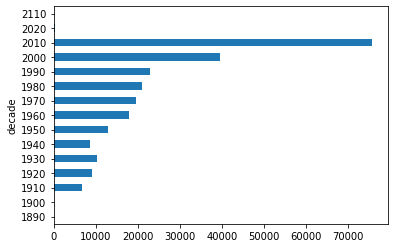

In [42]:
movies_sorted_year_df = movies.sort_values(by='year')
movies_sorted_year_df['decade'] = (movies_sorted_year_df['year'] / 10).astype(int) * 10
movies_sorted_year_df.groupby(['decade'])['title'].count().plot(kind='barh')

 What are the top 10 most common character names in movie history?

In [43]:
cast_character_series = cast.groupby(['character'])['title'].count()
cast_character_series.sort_values(ascending=False).head(10)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: title, dtype: int64

Who are the top 10 people most often credited as "Herself" in movie history?

In [44]:
cast_character_herself_series = cast['character'] == 'Herself'
cast_character_herself_df = cast[cast_character_herself_series]
cast_character_herself_people_series = cast_character_herself_df.groupby(['name']).size()
cast_character_herself_people_series.sort_values(ascending=False).head(10)

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
dtype: int64

Who are the top 10 people most often credited as "Himself" in movie history?

In [45]:
cast_character_himself_series = cast['character'] == 'Himself'
cast_character_himself_df = cast[cast_character_himself_series]
cast_character_himself_people_series = cast_character_himself_df.groupby(['name']).size()
cast_character_himself_people_series.sort_values(ascending=False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

What are the top 10 most frequent roles that start with the word "Zombie"?

In [46]:
cast_character_series = cast['character']
cast_character_series[cast_character_series.str.startswith('Zombie')].sort_values(ascending=False).head(10)

3147629                   Zombies' Hands
3769506                   Zombies' Hands
1665264                   Zombies' Hands
1499220    Zombies in a Shed" - Segment)
1499223    Zombies in a Shed" - Segment)
1049607           Zombies and Insurgents
133209            Zombies and Insurgents
1022752           Zombies and Insurgents
2387124           Zombies and Insurgents
1764871           Zombies and Insurgents
Name: character, dtype: object

What are the top 10 most frequent roles that start with the word "Police"?

In [47]:
cast_character_series = cast['character']
cast_character_series[cast_character_series.str.startswith('Police')].sort_values(ascending=False).head(10)

2615918                 Policewomen
3712012                 Policewomen
1095370      Policewoman's neighbor
3634714      Policewoman's neighbor
3626708         Policewoman's Voice
2724009          Policewoman's Girl
3064028    Policewoman with Glasses
2801606          Policewoman square
3778265      Policewoman restaurant
3383532         Policewoman on Roof
Name: character, dtype: object

Plot how many roles 'Keanu Reeves' has played in each year of his career.

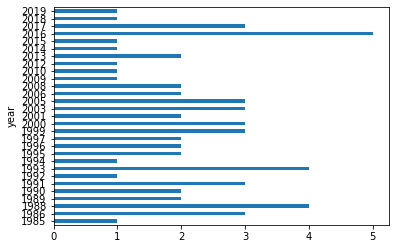

In [48]:
cast_keanu_reeves_series = cast['name'] == 'Keanu Reeves'
cast_keanu_reeves_df = cast[cast_keanu_reeves_series]
cast_keanu_reeves_df.groupby(['year'])['character'].count().plot(kind='barh')

Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.

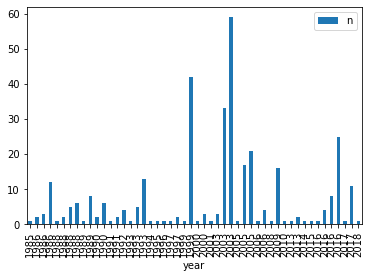

In [49]:
cast_keanu_reeves_series = cast['name'] == 'Keanu Reeves'
cast_keanu_reeves_df = cast[cast_keanu_reeves_series]
cast_keanu_reeves_no_nan_n_df = cast_keanu_reeves_df[cast_keanu_reeves_df['n'].notnull()]  # only plotting non NaN values
grouped_cast_keanu_reeves_no_nan_n_df = cast_keanu_reeves_no_nan_n_df.groupby(['year', 'n'])['title'].count()
grouped_cast_keanu_reeves_no_nan_n_reset_index_df = grouped_cast_keanu_reeves_no_nan_n_df.reset_index()
grouped_cast_keanu_reeves_no_nan_n_reset_index_df.plot(x='year', y='n', kind='bar')

Plot the number of "Hamlet" films made by each decade.

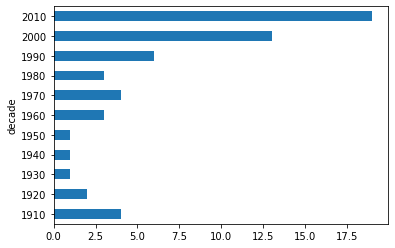

In [50]:
movies_title_series = movies['title']
movies_title_Hamlet_df = movies[movies_title_series.str.contains('Hamlet')]
sorted_movies_title_Hamlet_df = movies_title_Hamlet_df.sort_values(by='year')
sorted_movies_title_Hamlet_df['decade'] = (sorted_movies_title_Hamlet_df['year'] / 10).astype(int) * 10
sorted_movies_title_Hamlet_df.groupby(['decade'])['title'].count().plot(kind='barh')

How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

In [51]:
cast_1960s_series = (cast['year'] / 10).astype(int) * 10 == 1960
cast_1960s_df = cast[cast_1960s_series]
cast_1960s_leading_roles_series = cast_1960s_df['n'] == 1.0
cast_1960s_leading_roles_df = cast_1960s_df[cast_1960s_leading_roles_series]
len(cast_1960s_leading_roles_df[cast_1960s_leading_roles_df['type'] == 'actor']) + len(cast_1960s_leading_roles_df[cast_1960s_leading_roles_df['type'] == 'actress'])

11823

How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

In [52]:
cast_2000s_series = (cast['year'] / 10).astype(int) * 10 == 2000
cast_2000s_df = cast[cast_2000s_series]
cast_2000s_leading_roles_series = cast_2000s_df['n'] == 1.0
cast_2000s_leading_roles_df = cast_2000s_df[cast_2000s_leading_roles_series]
len(cast_2000s_leading_roles_df[cast_2000s_leading_roles_df['type'] == 'actor']) + len(cast_2000s_leading_roles_df[cast_2000s_leading_roles_df['type'] == 'actress'])

26344

List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [53]:
cast_frank_oz_series = cast['name'] == 'Frank Oz'
cast_frank_oz_df = cast[cast_frank_oz_series]
grouped_cast_frank_oz_df = cast_frank_oz_df.groupby(['year', 'title'])['character'].count()
grouped_cast_frank_oz_played_more_than_1_role_df = grouped_cast_frank_oz_df[grouped_cast_frank_oz_df > 1]
grouped_cast_frank_oz_played_more_than_1_role_df

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
Name: character, dtype: int64

List each of the characters that Frank Oz has portrayed at least twice.

In [54]:
cast_frank_oz_series = cast['name'] == 'Frank Oz'
cast_frank_oz_df = cast[cast_frank_oz_series]
grouped_cast_frank_oz_df = cast_frank_oz_df.groupby(['character'])['title'].count()
grouped_cast_frank_oz_atleast_twice_df = grouped_cast_frank_oz_df[grouped_cast_frank_oz_df > 1]
grouped_cast_frank_oz_atleast_twice_df

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: title, dtype: int64

### Advanced Merging, Querying and Visualizations

Make a bar plot with the following conditions.
Frequency of the number of movies with "Christmas" in their title.
Movies should be such that they are released in the USA.
Show the frequency plot by month.

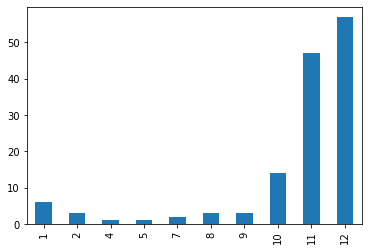

In [56]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

Make a bar plot with the following conditions.
Frequency of the number of movies with "Summer" in their title.
Movies should be such that they are released in the USA.
Show the frequency plot by month.

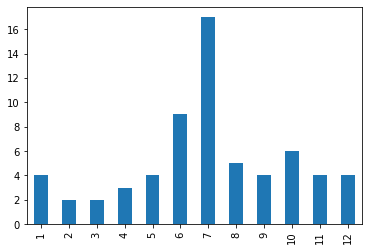

In [57]:
summer_in_title = release_dates[release_dates.title.str.contains('Summer')]
summer_in_title_released_in_usa = summer_in_title[summer_in_title.country == 'USA']
summer_in_title_released_in_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

Make a bar plot with the following conditions.
Frequency of the number of movies with "Action" in their title.
Movies should be such that they are released in the USA.
Show the frequency plot by week.

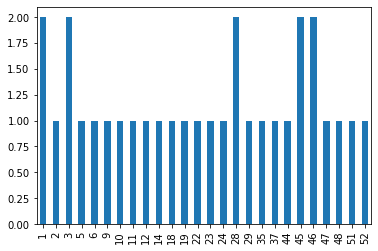

In [58]:
action_in_title = release_dates[release_dates.title.str.contains('Action')]
action_in_title_released_in_usa = action_in_title[action_in_title.country == 'USA']
action_in_title_released_in_usa.date.dt.week.value_counts().sort_index().plot(kind='bar')

Show all the movies in which Keanu Reeves has played the lead role along with their release date in the USA sorted by the date of release.

In [59]:
keanu_reeves_movies = cast[cast.name == 'Keanu Reeves']
keanu_reeves_lead_role_movies = keanu_reeves_movies[keanu_reeves_movies.n == 1.0]
released_in_usa = release_dates[release_dates.country == 'USA']
keanu_reeves_lead_role_movies_released_in_usa = keanu_reeves_lead_role_movies.merge(released_in_usa, how='left')
keanu_reeves_lead_role_movies_released_in_usa_not_null_series = keanu_reeves_lead_role_movies_released_in_usa['country'].notnull()
keanu_reeves_lead_role_movies_released_in_usa_not_null = keanu_reeves_lead_role_movies_released_in_usa[keanu_reeves_lead_role_movies_released_in_usa_not_null_series]
result_df = keanu_reeves_lead_role_movies_released_in_usa_not_null.sort_values(by=['date'])[['title', 'date']].reset_index(drop=True)
result_df

,title,date
0,The Night Before,1988-04-15
1,Bill & Ted's Excellent Adventure,1989-02-17
2,Bill & Ted's Bogus Journey,1991-07-19
3,Little Buddha,1994-05-25
4,Speed,1994-06-10
5,Johnny Mnemonic,1995-05-26
6,A Walk in the Clouds,1995-08-11
7,Chain Reaction,1996-08-02
8,Feeling Minnesota,1996-09-13
9,The Devil's Advocate,1997-10-17


Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

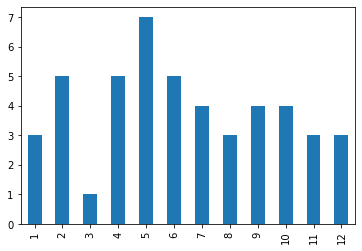

In [60]:
keanu_reeves_movies_df = cast[cast.name == 'Keanu Reeves']
keanu_reeves_movies = keanu_reeves_movies_df[['title', 'year']]
keanu_reeves_movies_not_null = keanu_reeves_movies[(keanu_reeves_movies['title'].notnull()) & (keanu_reeves_movies['year'].notnull())]
released_in_usa = release_dates[release_dates.country == 'USA']
keanu_reeves_movies_released_in_usa_with_nulls = keanu_reeves_movies_not_null.merge(released_in_usa, how='left')
keanu_reeves_movies_released_in_usa = keanu_reeves_movies_released_in_usa_with_nulls[keanu_reeves_movies_released_in_usa_with_nulls['country'].notnull()]
keanu_reeves_movies_released_in_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

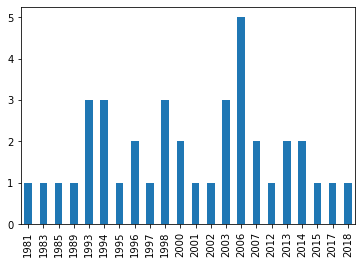

In [61]:
ian_mckellen_movies_df = cast[cast.name == 'Ian McKellen']
ian_mckellen_movies = ian_mckellen_movies_df[['title', 'year']]
ian_mckellen_movies_not_null = ian_mckellen_movies[(ian_mckellen_movies['title'].notnull()) & (ian_mckellen_movies['year'].notnull())]
released_in_usa = release_dates[release_dates.country == 'USA']
ian_mckellen_movies_released_in_usa_with_nulls = ian_mckellen_movies_not_null.merge(released_in_usa, how='left')
ian_mckellen_movies_released_in_usa = ian_mckellen_movies_released_in_usa_with_nulls[ian_mckellen_movies_released_in_usa_with_nulls['country'].notnull()]
ian_mckellen_movies_released_in_usa.date.dt.year.value_counts().sort_index().plot(kind='bar')